# Analisis basico de resumen de casos corona virus Guatemala 2020

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dir_resumen = '../data/resumen_todos.csv'
casos = pd.read_csv(dir_resumen, header = 0, parse_dates = True)

# dar formato a fechas
cols_fecha = ["fecha"]
for col in cols_fecha:
    casos[col] = pd.to_datetime(casos[col], yearfirst = True)

# mostrar columnas y tipo de dato
print(casos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 5 columns):
fecha          55 non-null datetime64[ns]
confirmados    55 non-null int64
recuperados    55 non-null int64
fallecidos     55 non-null int64
activos        55 non-null int64
dtypes: datetime64[ns](1), int64(4)
memory usage: 2.2 KB
None


In [3]:
casos = casos.set_index(keys = 'fecha', drop = True)
#casos = casos.drop(columns = 'fuente') # ignorar fuente de informacion
# mostrar algunos datos
print(casos.head())

                     confirmados  recuperados  fallecidos  activos
fecha                                                             
2020-03-13 06:00:00            1            0           0        1
2020-03-14 06:00:00            2            0           0        2
2020-03-15 06:00:00            3            0           1        2
2020-03-16 06:00:00            6            0           1        5
2020-03-17 06:00:00            6            0           1        5


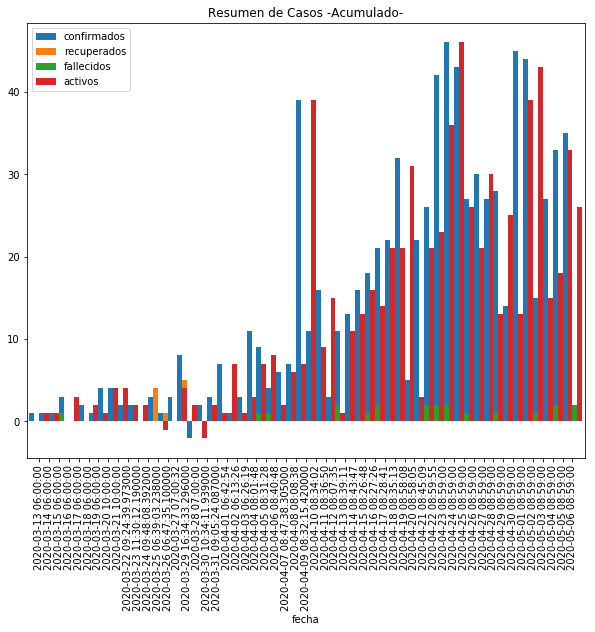

In [4]:
fig1 = plt.figure(figsize=(10,8))
fig1ax1 = fig1.add_subplot(1,1,1)
fig1ax1.set_title('Resumen de Casos -Acumulado-')
reversed_cumsum = casos-casos.shift(1).fillna(0)
reversed_cumsum.plot.bar(ax = fig1ax1 , width = 2)

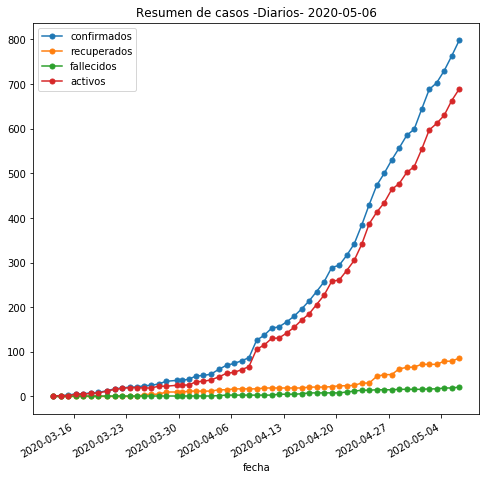

In [5]:
fig2 = plt.figure(figsize=(8,8))
fig2ax1 = fig2.add_subplot(1,1,1)
fig2ax1.set_title('Resumen de casos -Diarios- {}'.format(casos.index.tolist()[-1].strftime('%Y-%m-%d')))
casos.plot( ax = fig2ax1, marker='.',markersize=10)
fig2.savefig("../imgs/resumen.png".format())